
 a0002-dgw_005_0.JPG
  Contrast: Good Contrast (Histogram Spread) (Range: 200)
  Exposure classification: Underexposed


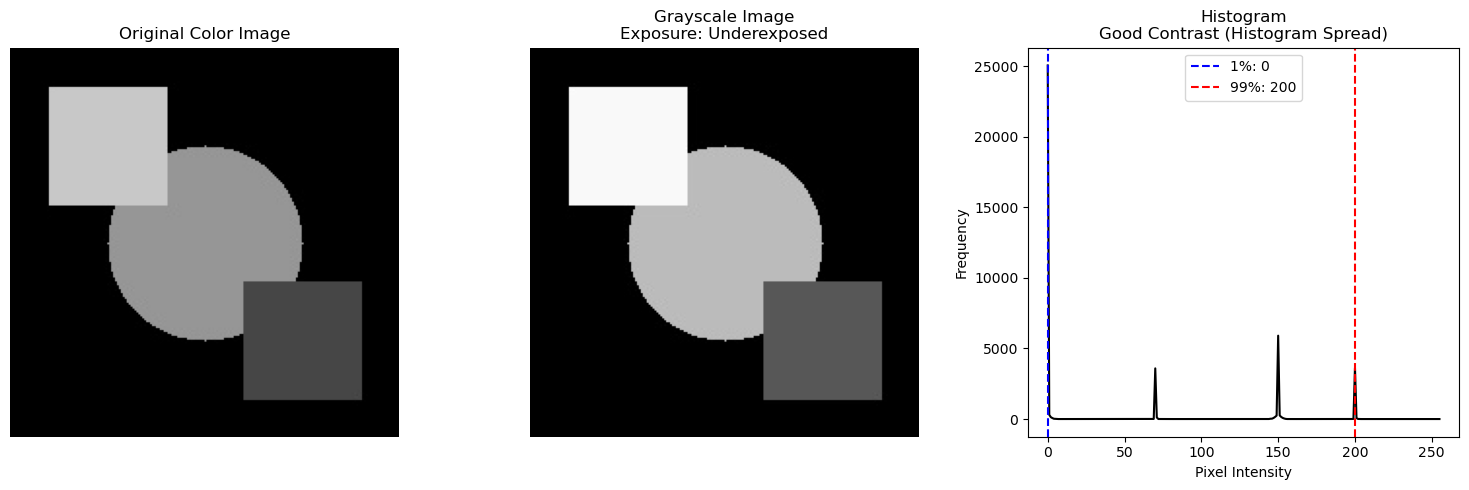


 a0005-jn_2007_05_10__564_P1.5.JPG
  Contrast: Good Contrast (Histogram Spread) (Range: 239)
  Exposure classification: Underexposed


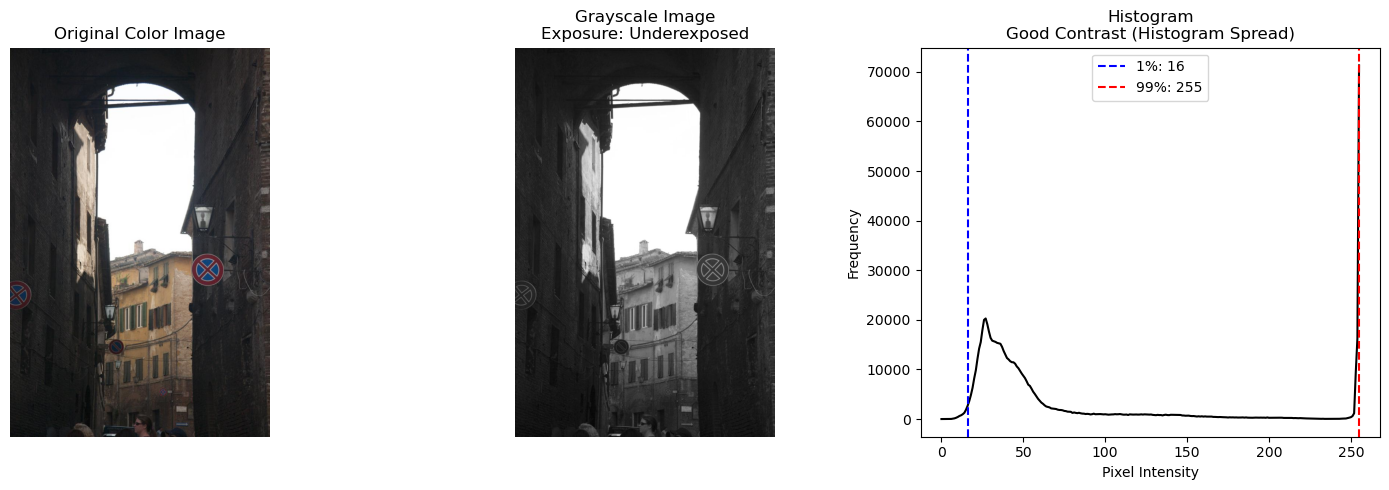


 a0006-IMG_2787_0.JPG
  Contrast: Moderate Contrast (Range: 145)
  Exposure classification: Normal Exposure


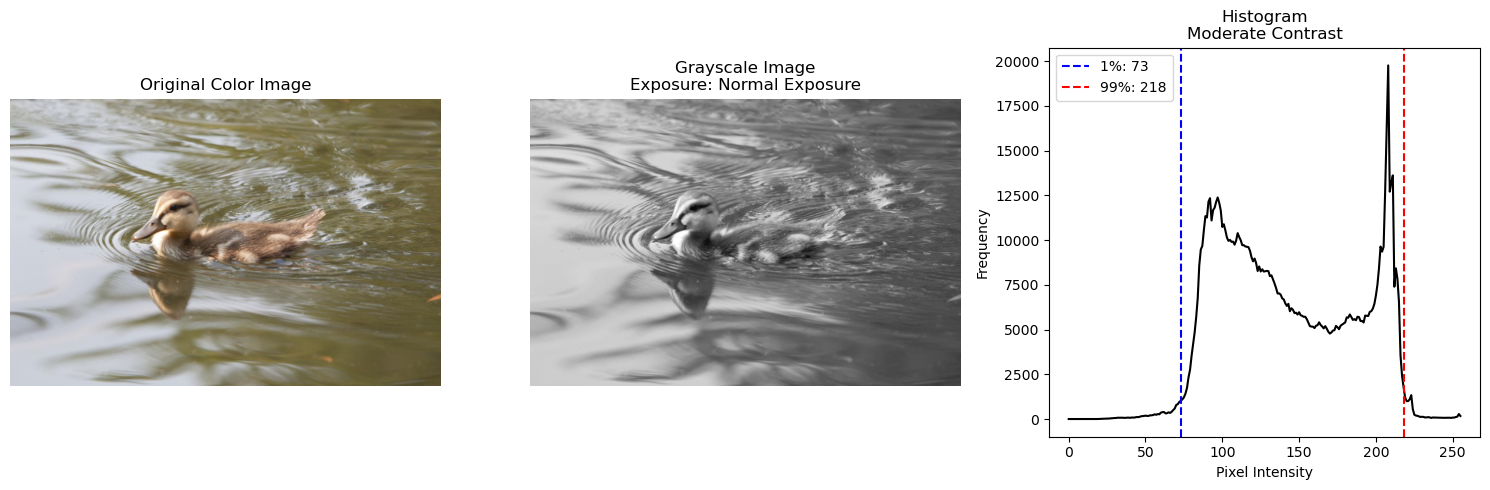


 a0007-IMG_2480_N1.5.JPG
  Contrast: Moderate Contrast (Range: 131)
  Exposure classification: Underexposed


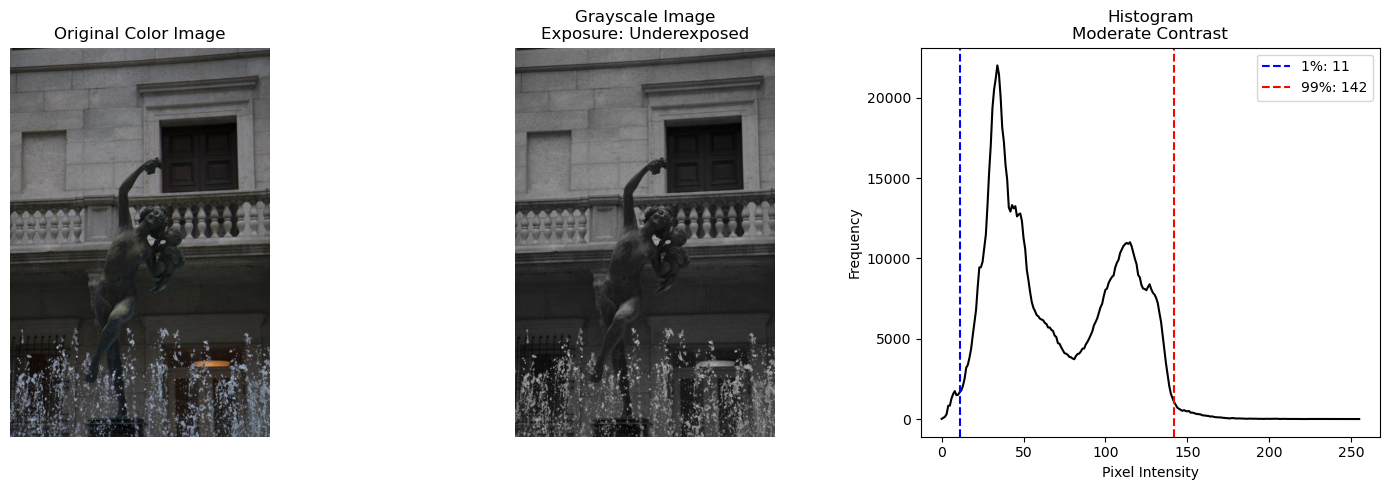


 a0008-WP_CRW_3959_0.JPG
  Contrast: Moderate Contrast (Range: 117)
  Exposure classification: Normal Exposure


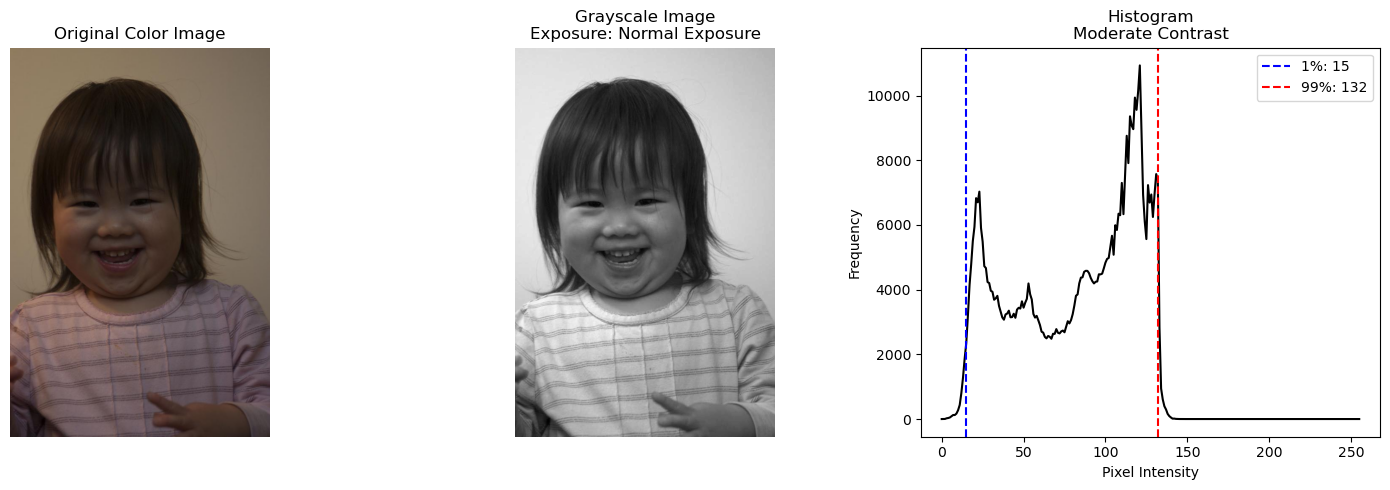


 a0008-WP_CRW_3959_P1.5.JPG
  Contrast: Good Contrast (Histogram Spread) (Range: 177)
  Exposure classification: Overexposed


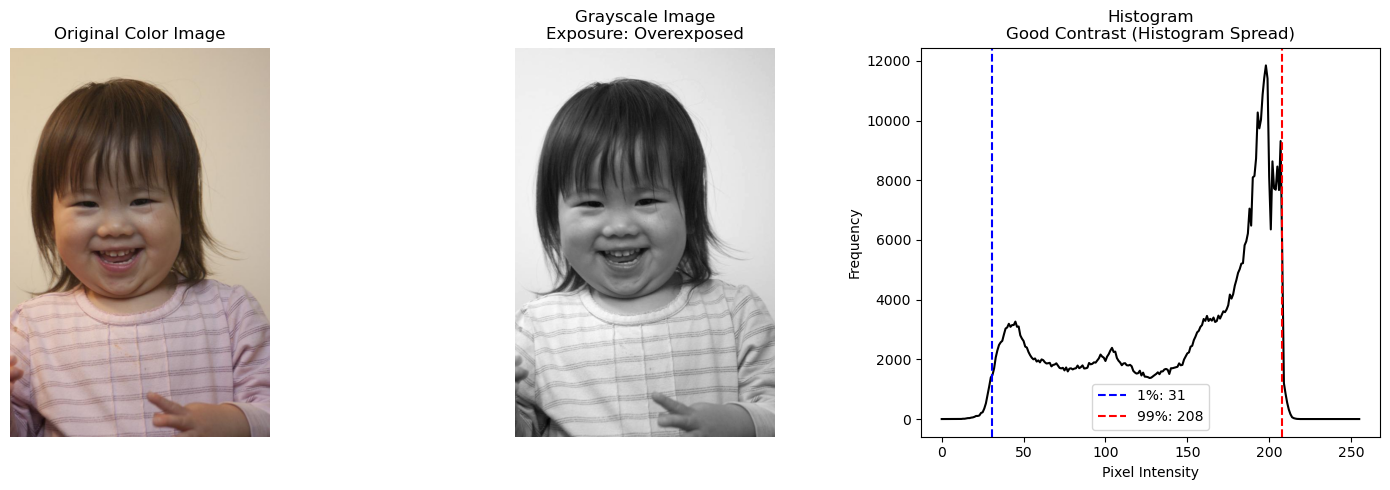


 a0009-kme_372_P1.5.JPG
  Contrast: Good Contrast (Histogram Spread) (Range: 188)
  Exposure classification: Normal Exposure


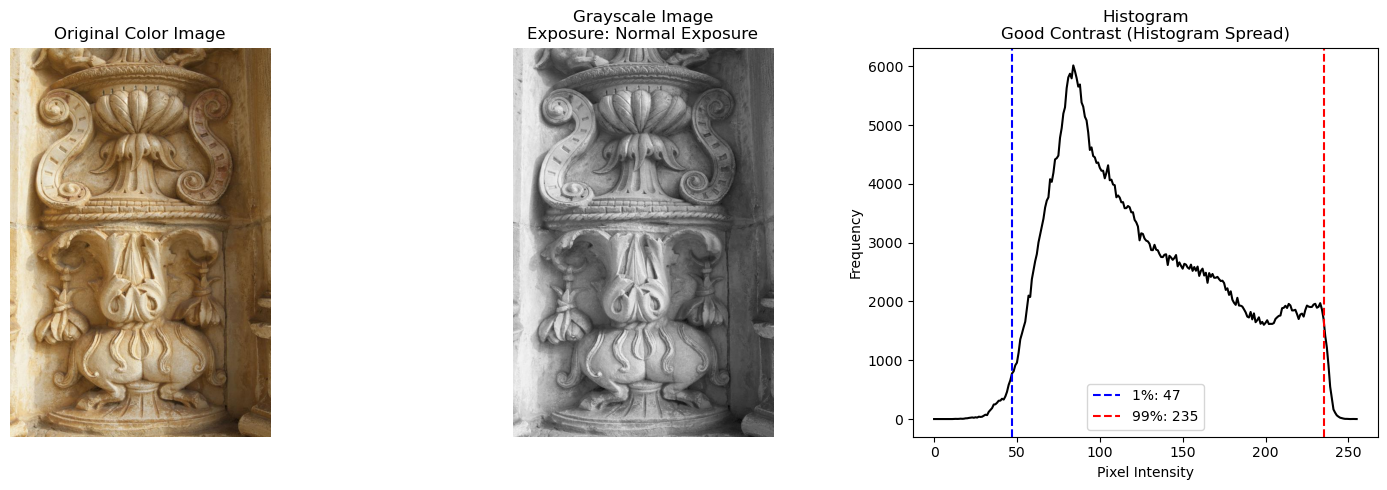


 a0013-MB_20030906_001_0.JPG
  Contrast: Good Contrast (Histogram Spread) (Range: 224)
  Exposure classification: Normal Exposure


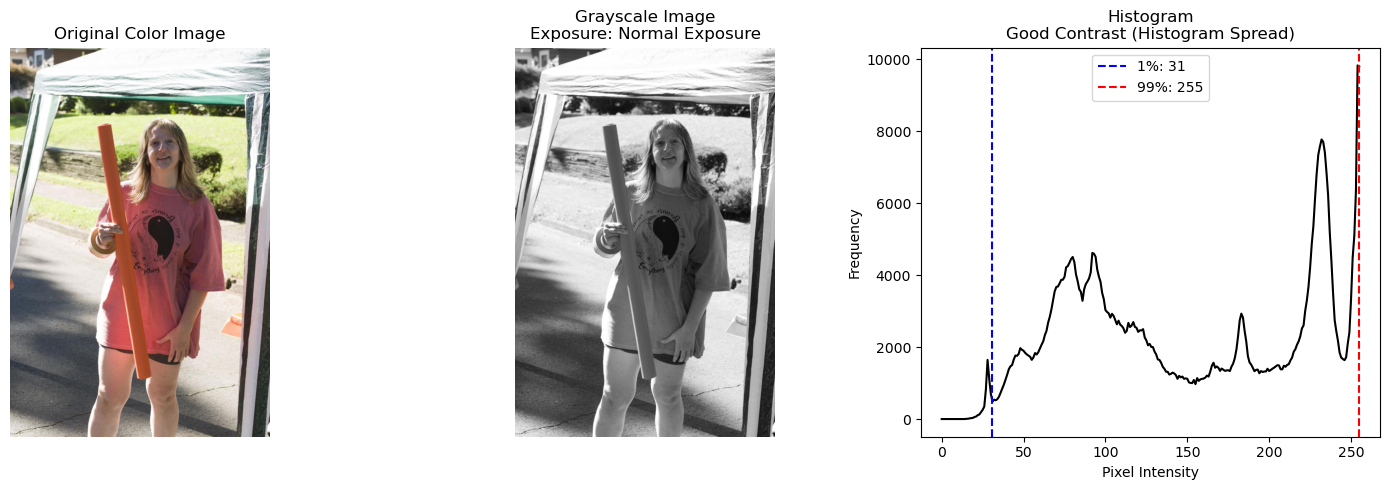


 a0014-WP_CRW_6320_N1.5.JPG
  Contrast: Moderate Contrast (Range: 143)
  Exposure classification: Underexposed


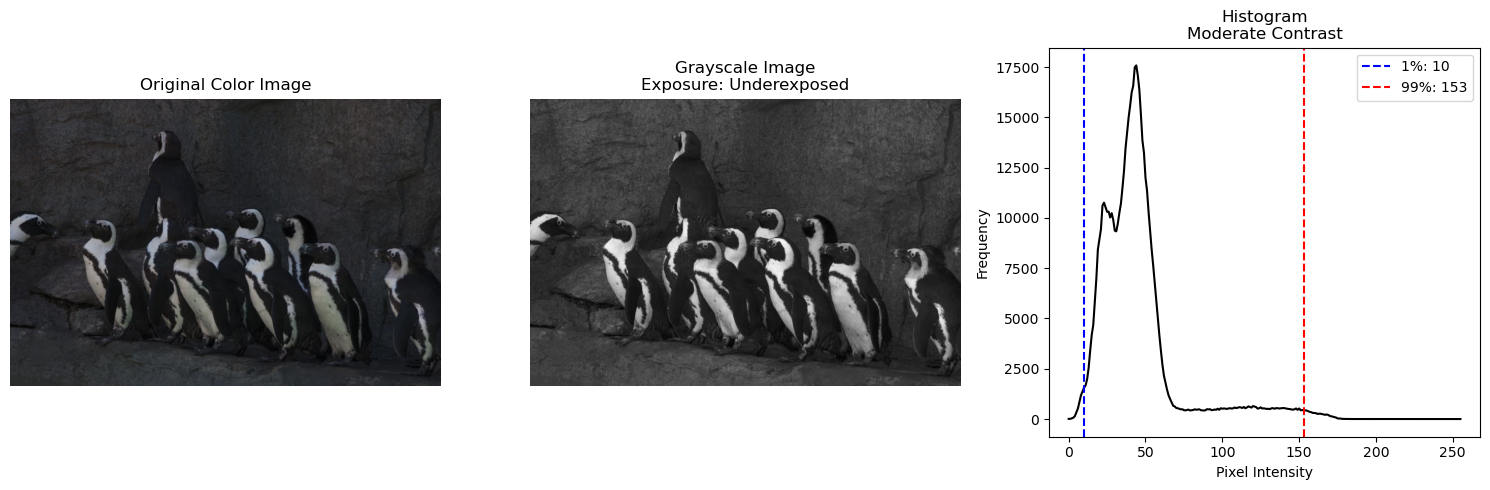


 a0023-07-06-02-at-15h06m48-s_MG_1489_0.JPG
  Contrast: Good Contrast (Histogram Spread) (Range: 195)
  Exposure classification: Underexposed


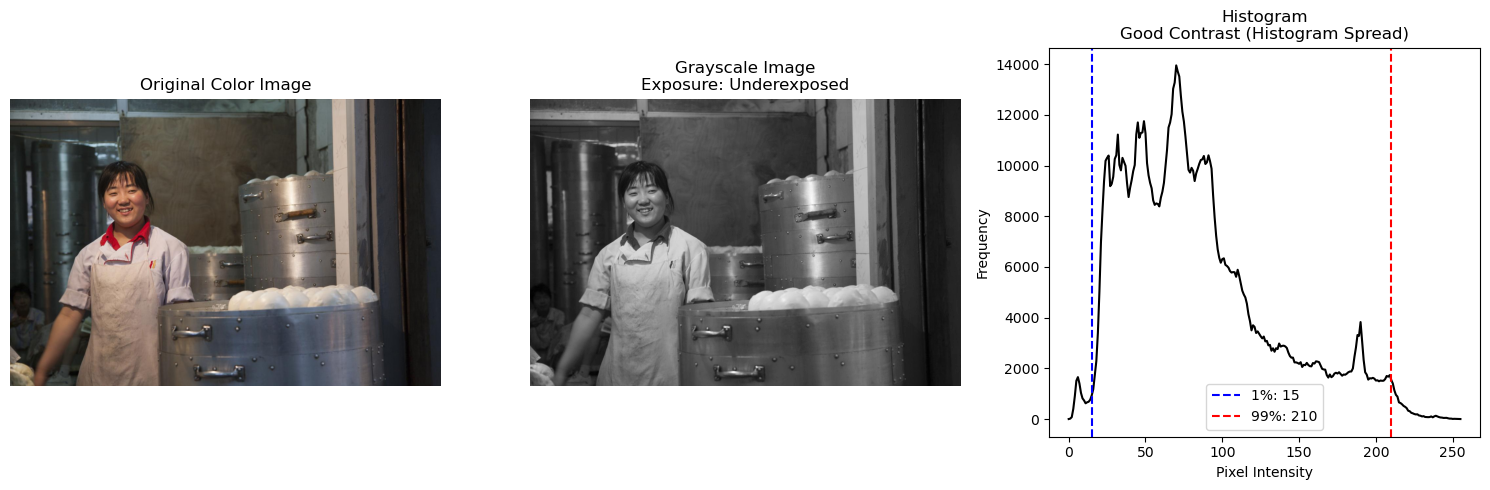


 a0023-07-06-02-at-15h06m48-s_MG_1489_P1.5.JPG
  Contrast: Good Contrast (Histogram Spread) (Range: 218)
  Exposure classification: Normal Exposure


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline


def analyze_contrast_with_histogram(gray):
    # Calculate histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist = hist.flatten()

    # Normalize histogram to use for percentile analysis
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]

    # Percentile-based min/max limits
    low_percentile = np.searchsorted(cdf_normalized, 0.01)
    high_percentile = np.searchsorted(cdf_normalized, 0.99)

    contrast_range = high_percentile - low_percentile

    # Classify contrast based on range
    if contrast_range < 90:
        contrast_status = "Poor Contrast (Histogram Congested)"
    elif contrast_range > 150:
        contrast_status = "Good Contrast (Histogram Spread)"
    else:
        contrast_status = "Moderate Contrast"

    return contrast_status, hist, low_percentile, high_percentile

def classify_exposure(img, under_thresh=80, over_thresh=150, dark_ratio_thresh=0.5, bright_ratio_thresh=0.5):
    total_pixels = img.size
    dark_pixels = np.sum(img < under_thresh)
    bright_pixels = np.sum(img > over_thresh)

    dark_ratio = dark_pixels / total_pixels
    bright_ratio = bright_pixels / total_pixels

    if dark_ratio > dark_ratio_thresh:
        return "Underexposed"
    elif bright_ratio > bright_ratio_thresh:
        return "Overexposed"
    else:
        return "Normal Exposure"

def process_and_analyze_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f" Skipping unreadable file: {image_path}")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image

    # Analyze histogram-based contrast
    contrast_status, hist, low_p, high_p = analyze_contrast_with_histogram(gray)

    # Analyze exposure
    exposure_status = classify_exposure(gray)

    # Print results
    print(f"\n {os.path.basename(image_path)}")
    print(f"  Contrast: {contrast_status} (Range: {high_p - low_p})")
    print(f"  Exposure classification: {exposure_status}")

    # Convert BGR to RGB for matplotlib display of original image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot original color, grayscale, and histogram side-by-side
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title("Original Color Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title(f"Grayscale Image\nExposure: {exposure_status}")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.plot(hist, color='black')
    plt.axvline(low_p, color='blue', linestyle='--', label=f"1%: {low_p}")
    plt.axvline(high_p, color='red', linestyle='--', label=f"99%: {high_p}")
    plt.title(f"Histogram\n{contrast_status}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

def process_image_folder(folder_path):
    supported_exts = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(supported_exts)]

    if not image_files:
        print("No images found in folder:", folder_path)
        return

    for filename in image_files:
        image_path = os.path.join(folder_path, filename)
        process_and_analyze_image(image_path)

if __name__ == "__main__":
    folder_path = "C:\\Users\\Admin\\Downloads\\Image Dataset"
    process_image_folder(folder_path)
